In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

from google.colab import drive
import os

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

# Wait until Google Drive is mounted
while not os.path.exists('/content/drive/My Drive/'):
    pass

Mounted at /content/drive


In [3]:
# Drive folder to save the file
# Drive folder to save the file
mailing_path = '/content/drive/My Drive/IMT Atlantique/Semester 2/Project Complex/Coding/Mailing Lists/data/final/'
commits_path = '/content/drive/My Drive/IMT Atlantique/Semester 2/Project Complex/Coding/salsa.debian.org/'

# Create the folder if it doesn't exist
#os.makedirs(folder_path, exist_ok=True)

# DPKG

## Activities counting

In [4]:
# Load data from mailing lists and commit history
mailing_list_data = pd.read_csv(mailing_path + 'email_content_dpkg_company_contributor.csv')
commit_history_data = pd.read_csv(commits_path + "data/dpkg.csv")

In [5]:
mailing_list_data.head()

,Date,From,To,Subject,Content,Link,Company,Receiver
0,2023-12-29 15:49:07+00:00,Niels Thykier <niels@thykier.net>,Dpkg-Maintainers <debian-dpkg@lists.debian.org>,Re: Proper way to do setcap in maintscript,Niels Thykier:,https://lists.debian.org/debian-dpkg/2023/debi...,Thykier,Debian
1,2023-12-29 15:49:07+00:00,Niels Thykier <niels@thykier.net>,Dpkg-Maintainers <debian-dpkg@lists.debian.org>,Re: Proper way to do setcap in maintscript,Niels Thykier:,https://lists.debian.org/debian-dpkg/2023/debi...,Thykier,Debian
2,2023-12-29 15:49:07+00:00,Niels Thykier <niels@thykier.net>,Dpkg-Maintainers <debian-dpkg@lists.debian.org>,Re: Proper way to do setcap in maintscript,Niels Thykier:,https://lists.debian.org/debian-dpkg/2023/debi...,Thykier,Debian
3,2023-12-29 15:49:07+00:00,Niels Thykier <niels@thykier.net>,Dpkg-Maintainers <debian-dpkg@lists.debian.org>,Re: Proper way to do setcap in maintscript,Niels Thykier:,https://lists.debian.org/debian-dpkg/2023/debi...,Thykier,Debian
4,2023-12-29 15:49:07+00:00,Niels Thykier <niels@thykier.net>,Dpkg-Maintainers <debian-dpkg@lists.debian.org>,Re: Proper way to do setcap in maintscript,Niels Thykier:,https://lists.debian.org/debian-dpkg/2023/debi...,Thykier,Debian


In [6]:
commit_history_data.head()

,commit_id,author,email,timestamp,message,repository,repository_size,commits_count
0,54a1a23d3960b496e6d12dbb973b895f5c2e4d3b,Nicolas Boulenguez,nicolas@debian.org,2024-03-09 17:21:53+01:00,scripts/mk: Generate the _FOR_BUILD variant of...,dpkg,139919638,12480
1,61f824cf17ca87db571f2754207726aae78986cd,Nicolas Boulenguez,nicolas@debian.org,2024-04-09 05:31:16+02:00,scripts/mk: Search once for parrallel= in DEB_...,dpkg,139919638,12480
2,d5835c5873f6eb8557a6ae54653cc7817e0057f0,Nicolas Boulenguez,nicolas@debian.org,2024-04-09 04:56:26+02:00,scripts/mk: Use explicit test of $(origin) ins...,dpkg,139919638,12480
3,c0dde13fd6cccea101dc72b3705d8d6d4e7a9ed7,Nicolas Boulenguez,nicolas@debian.org,2024-04-09 04:47:05+02:00,scripts/mk: Use filter instead of findstring\n...,dpkg,139919638,12480
4,8966616fa592c811b2950043f0273faada383493,Nicolas Boulenguez,nicolas@debian.org,2024-04-09 04:25:02+02:00,scripts/mk: Protect files against double inclu...,dpkg,139919638,12480


In [7]:
# Rename the 'Date' column to 'timestamp'
mailing_list_data.rename(columns={'Date': 'timestamp'}, inplace=True)

In [8]:
# Convert timestamps to datetime objects
mailing_list_data['timestamp'] = pd.to_datetime(mailing_list_data['timestamp'])
commit_history_data['timestamp'] = pd.to_datetime(commit_history_data['timestamp'])

In [9]:
# Convert timestamp column to datetime format
mailing_list_data['timestamp'] = pd.to_datetime(mailing_list_data['timestamp'], utc=True)
commit_history_data['timestamp'] = pd.to_datetime(commit_history_data['timestamp'], utc=True)

In [10]:
# Aggregate mailing list activity by day
mailing_list_activity = mailing_list_data.resample('D', on='timestamp').count()

# Aggregate commit activity by day
commit_activity = commit_history_data.resample('D', on='timestamp').count()

In [11]:
# Filter the dataframe to keep only records between 2003 and 2023
mailing_list_data = mailing_list_data[(mailing_list_data['timestamp'].dt.year >= 2003) & (mailing_list_data['timestamp'].dt.year <= 2023)]
commit_history_data = commit_history_data[(commit_history_data['timestamp'].dt.year >= 2003) & (commit_history_data['timestamp'].dt.year <= 2023)]

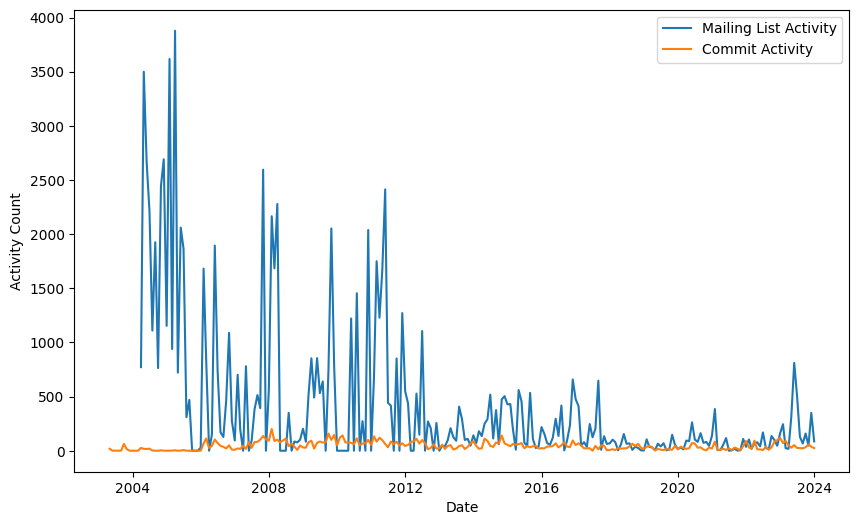

In [12]:
# Aggregate mailing list activity by month
monthly_mailing_list_activity = mailing_list_data.resample('M', on='timestamp').count()

# Aggregate commit activity by month
monthly_commit_activity = commit_history_data.resample('M', on='timestamp').count()

# Plot mailing list activity and commit activity over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_mailing_list_activity.index, monthly_mailing_list_activity['Subject'], label='Mailing List Activity')
plt.plot(monthly_commit_activity.index, monthly_commit_activity['message'], label='Commit Activity')
plt.xlabel('Date')
plt.ylabel('Activity Count')
#plt.title('Mailing List Activity vs. Commit Activity Over Time')
plt.legend()
plt.show()

## String Similarity Metrics

### Cosine similarity

#### Preprocessing

In [13]:
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
# Download nltk resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation except for hyphens
    text = re.sub(r'[^\w\s-]', ' ', text)

    # Remove numbers combined with letters (e.g., b4i38t)
    text = re.sub(r'\b[a-zA-Z]+\d+[a-zA-Z]*\b', ' ', text)

    # Remove individual letters
    text = re.sub(r'\b[a-zA-Z]\b', ' ', text)

    # Remove underscores
    text = re.sub(r'_', ' ', text)

    # Remove numbers
    text = re.sub(r'\b\d{1,}\b', ' ', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove date patterns
    text = re.sub(r'[A-Za-z]{3} \d{2} [A-Za-z]{3} \d{4} \d{6}[ap]m \d{4}', ' ', text)

    # Remove links
    text = re.sub(r'\bhttp\w*html?\b|\b\w*http\w*\b', ' ', text)

    # Remove PGP signed text
    text = re.sub(r'-----BEGIN PGP SIGNED MESSAGE-----.+?-----END PGP SIGNATURE-----', ' ', text, flags=re.DOTALL)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return text

In [16]:
# Apply text preprocessing to the 'Content' column
mailing_list_data['Preprocessed_Content'] = mailing_list_data['Content'].apply(preprocess_text)

In [17]:
# Display the preprocessed text
mailing_list_data[['Content', 'Preprocessed_Content']].head()

,Content,Preprocessed_Content
0,Niels Thykier:,niels thykier
1,Niels Thykier:,niels thykier
2,Niels Thykier:,niels thykier
3,Niels Thykier:,niels thykier
4,Niels Thykier:,niels thykier


In [18]:
# Filter rows based on the condition
filtered_df = mailing_list_data[mailing_list_data['Content'] == "Niels Thykier:"]

In [19]:
filtered_df

,timestamp,From,To,Subject,Content,Link,Company,Receiver,Preprocessed_Content
0,2023-12-29 15:49:07+00:00,Niels Thykier <niels@thykier.net>,Dpkg-Maintainers <debian-dpkg@lists.debian.org>,Re: Proper way to do setcap in maintscript,Niels Thykier:,https://lists.debian.org/debian-dpkg/2023/debi...,Thykier,Debian,niels thykier
1,2023-12-29 15:49:07+00:00,Niels Thykier <niels@thykier.net>,Dpkg-Maintainers <debian-dpkg@lists.debian.org>,Re: Proper way to do setcap in maintscript,Niels Thykier:,https://lists.debian.org/debian-dpkg/2023/debi...,Thykier,Debian,niels thykier
2,2023-12-29 15:49:07+00:00,Niels Thykier <niels@thykier.net>,Dpkg-Maintainers <debian-dpkg@lists.debian.org>,Re: Proper way to do setcap in maintscript,Niels Thykier:,https://lists.debian.org/debian-dpkg/2023/debi...,Thykier,Debian,niels thykier
3,2023-12-29 15:49:07+00:00,Niels Thykier <niels@thykier.net>,Dpkg-Maintainers <debian-dpkg@lists.debian.org>,Re: Proper way to do setcap in maintscript,Niels Thykier:,https://lists.debian.org/debian-dpkg/2023/debi...,Thykier,Debian,niels thykier
4,2023-12-29 15:49:07+00:00,Niels Thykier <niels@thykier.net>,Dpkg-Maintainers <debian-dpkg@lists.debian.org>,Re: Proper way to do setcap in maintscript,Niels Thykier:,https://lists.debian.org/debian-dpkg/2023/debi...,Thykier,Debian,niels thykier
5,2023-12-29 15:49:07+00:00,Niels Thykier <niels@thykier.net>,Dpkg-Maintainers <debian-dpkg@lists.debian.org>,Re: Proper way to do setcap in maintscript,Niels Thykier:,https://lists.debian.org/debian-dpkg/2023/debi...,Thykier,Debian,niels thykier
6,2023-12-29 15:49:07+00:00,Niels Thykier <niels@thykier.net>,Dpkg-Maintainers <debian-dpkg@lists.debian.org>,Re: Proper way to do setcap in maintscript,Niels Thykier:,https://lists.debian.org/debian-dpkg/2023/debi...,Thykier,Debian,niels thykier
7,2023-12-29 15:49:07+00:00,Niels Thykier <niels@thykier.net>,Dpkg-Maintainers <debian-dpkg@lists.debian.org>,Re: Proper way to do setcap in maintscript,Niels Thykier:,https://lists.debian.org/debian-dpkg/2023/debi...,Thykier,Debian,niels thykier
8,2023-12-29 15:49:07+00:00,Niels Thykier <niels@thykier.net>,Dpkg-Maintainers <debian-dpkg@lists.debian.org>,Re: Proper way to do setcap in maintscript,Niels Thykier:,https://lists.debian.org/debian-dpkg/2023/debi...,Thykier,Debian,niels thykier


In [20]:
# Drop the filtered rows from the main DataFrame
mailing_list_data = mailing_list_data.drop(filtered_df.index)

In [21]:
# Display the preprocessed text
mailing_list_data[['Content', 'Preprocessed_Content']].head(50)

,Content,Preprocessed_Content
9,Thank you for your contribution to Debian.\n\n...,thank you for your contribution to debian acce...
10,Thank you for your contribution to Debian.\n\n...,thank you for your contribution to debian acce...
11,Thank you for your contribution to Debian.\n\n...,thank you for your contribution to debian acce...
12,Thank you for your contribution to Debian.\n\n...,thank you for your contribution to debian acce...
13,Thank you for your contribution to Debian.\n\n...,thank you for your contribution to debian acce...
14,Thank you for your contribution to Debian.\n\n...,thank you for your contribution to debian acce...
15,Thank you for your contribution to Debian.\n\n...,thank you for your contribution to debian acce...
16,Thank you for your contribution to Debian.\n\n...,thank you for your contribution to debian acce...
17,dupload_2.10.5_amd64.changes uploaded successf...,dupload amd64 changes uploaded successfully to...
18,dupload_2.10.5_amd64.changes uploaded successf...,dupload amd64 changes uploaded successfully to...
